# STOR 535 Python Worksheet 3
**Instructor**: Dr. Amarjit Budhiraja

**Due date and time**: November 3, 2020, 9:45 AM

**Submitted by**: Xinyi Liu

## Submission Information:
0. **Download the file Python Worksheet 3.ipynb from Sakai**. This is under Resources $\rightarrow$ Homeworks. You will be doing all the work below in the Jupyter notebook.
1. Write your name in the box above.
2. Please make sure to print the output for each of the parts of the problems below. You will be graded based on these outputs.
3. After you complete the worksheet, generate a pdf of it using the instructions given in the Python tutorial on Aug 12, 2020. **Upload the pdf file as your submission on Gradescope. Do not submit the ipynb file.** 
4. Your final submission must be a single pdf file uploaded on Gradescope.

In [1]:
# Importing libraries. Add any more libraries you use here.

import numpy as np
import scipy.stats
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Useful for probability calculations
from scipy import stats

import random

## Problem 1: Estimating $\pi$


In this problem you will be computing an approximation to $\pi$ using uniform random variables. Let $U_1$ and $U_2$ be independent $U(-1,1)$ random variables. The probability that $(U_1, U_2)$ is in the unit circle $C = \{ (x_1, x_2): x_1^2 + x_2^2 \leq 1 \}$ was computed in HW 10B, Problem 3. In particular we have the following result:
  
  $$ \frac{\pi}{4} = P( (U_1, U_2) \text{ is in } C ),\\
  \implies \pi = 4 P( (U_1, U_2) \text{ is in } C ).
  $$
  
So if we can approximate $P( (U_1, U_2) \text{ is in } C )$, we will have an approximation to $\pi$ using the above formula. 

Follow the four steps given below to write Python code to estimate $\pi$. Your final output should be a single number, namely your approximation to $\pi$.

1. Generate two points $U_1, U_2$ from $U(-1,1)$ distribution, i.e. the uniform distribution on the interval $(-1,1)$.
2. Check if $(U_1, U_2)$  belongs to the unit circle, $C$.
3. Do step 1 and 2 above $10000$ times and record the proportion/relative frequency of times your generated point belongs to $C$. This is your approximation to $P( (U_1, U_2) \text{ is in } C )$.
4. Use the approximation to $P( (U_1, U_2) \text{ is in } C )$ from step 3 to compute an approximation to $\pi$. Your final output should be a single number, namely your approximation to $\pi$.


In [50]:
# Note: seed should be between 1 and 7, 3 is the one generating the most accurate result. DELETE seed() when submit.
random.seed(3) # fix a seed for random
U1=np.random.uniform(-1, 1)
U2=np.random.uniform(-1, 1)

if(U1**2+U2**2<=1):
    print("2.(U1,U2) belongs to the circle C")
else:print("2.(U1,U2) does not belong to the circle C")
    
count = 0
for i in range(10000):
    u1 = random.uniform(-1, 1)
    u2 = random.uniform(-1, 1)
    if u1**2 + u2**2 <= 1:
        count += 1

print("3.My approximation to  𝑃((𝑈1,𝑈2) in 𝐶 is", count/10000)
print("4.My approximation to  𝜋 is",4 * count / 10000)

2.(U1,U2) belongs to the circle C
3.My approximation to  𝑃((𝑈1,𝑈2) in 𝐶 is 0.7853
4.My approximation to  𝜋 is 3.1412


## Problem 2
The lifetime of a certain object follows a distribution whose cdf and inverse cdf are given below.
$$
F(x) = 1 - \frac{1}{x^2}, \quad \text{ for } x \geq 1 \text{ and } 0 \text { otherwise},\\
F^{-1}(y) = \frac{1}{\sqrt{1 - y}}, \quad \text{ for } 0 < y < 1.
$$

### 2a)
1. Generate $1000$ samples from this distribution
2. Use a histogram to visualize the approximation to the distribution obtained from the samples.


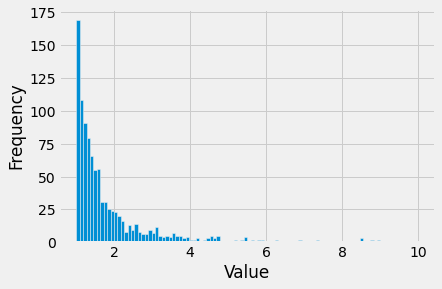

In [4]:
sample = []
for i in range(1000):
    sample.append(1 / (1 - random.uniform(0, 1))**(0.5))
plt.hist(sample, bins = 100, range=(1,10))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### 2b)
Use the $1000$ samples generated in part $2a)$ to compute an approximation to the expected lifetime of the object. 

In [6]:
#Your code for 2b
print(np.mean(sample))

2.009259706394746


## Problem 3: SAT scores
The SAT scores in NC in 2017 followed a normal distribution with mean $1081$ and standard deviation $176$.
### 3a
Plot the normal curve approximating the SAT scores between $500$ and $1700$. 

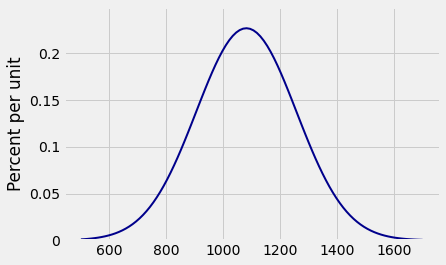

In [2]:
Plot_norm((500,1700), 1081, 176)

### 3b
Compute the probability that a randomly chosen student (who took the SAT in NC in 2017) has a score between $900$ and $1100$.

In [20]:
lower_bound = (900 - mean) / sd
upper_bound = (1100 - mean) / sd
p=stats.norm.cdf(upper_bound) - stats.norm.cdf(lower_bound)
print("Probability that a randomly chosen student has a score between  900  and  1100 is",p )

Probability that a randomly chosen student has a score between  900  and  1100 is 0.39110540855990555


### 3c
What was the $90$th percentile of the SAT scores in NC in 2017?

In [8]:
print((stats.norm.ppf(0.9) * sd) + mean)

1306.5530755358498
